
# How Elon Musk's tweets affect stock prices?


# Application setup

First of all, let's setup authentication to Twitter API.


In [1]:

import numpy
import tweepy
import pandas
import SECRETS
import re
import matplotlib.pyplot as plt
from IPython.display import display, HTML


In [2]:
# Authenticate to Twitter
auth = tweepy.OAuthHandler(SECRETS.API_KEY, SECRETS.API_SECRET_KEY)
auth.set_access_token(SECRETS.ACCESS_TOKEN, SECRETS.ACCESS_SECRET_TOKEN)

api = tweepy.API(auth)

try:
    api.verify_credentials()
    print('Authentication OK')
except:
    print('Error during authentication')


Authentication OK



Everything seems fine, we can proceed to download data.

5 latest tweets:


In [3]:

musk_tweets = api.user_timeline(screen_name='elonmusk',
                                count=5,
                                tweet_mode='extended'
                                )

for tweet in musk_tweets:
     print('------------')
     print("ID: {}".format(tweet.id))
     print(tweet.created_at)
     print(tweet.full_text)


------------
ID: 1396698902842122244
2021-05-24 05:25:42
@Cointelegraph He fears the … https://t.co/78WzM5ICjA
------------
ID: 1396280083589976064
2021-05-23 01:41:28
@SpaceNews_Inc Congrats! @virgingalactic
------------
ID: 1396230120692543489
2021-05-22 22:22:56
https://t.co/7afq6DIlzc
------------
ID: 1396226161718349824
2021-05-22 22:07:12
@flcnhvy @thatdogegirl @WhatsupFranks @TeslaGong Becoming multiplanetary is one of the greatest filters. Only now, 4.5 billion years after Earth formed, is it possible. 

How long this window to reach Mars remains open is uncertain. Perhaps a long time, perhaps not. 

In case it is the latter, we should act now.
------------
ID: 1396049958000685060
2021-05-22 10:27:01
@PPathole @SpaceX The hard part about Raptor is simplifying it



# Downloading tweets

We will download at least 5000 tweets to have reasonable data set.
It is worth mentioning here that the maximum allowed .user_timeline(count=) is 200.


In [4]:

downloaded_tweets = []
last_id = musk_tweets[-1].id

while len(downloaded_tweets)<5000:
    musk_tweets = api.user_timeline(screen_name='elonmusk',
                               count=200,
                               include_rts = False,
                               max_id = last_id - 1,
                               tweet_mode = 'extended'
                               )
    downloaded_tweets.extend(musk_tweets)
    # if len(musk_tweets) == 0:
    #     break
    if len(musk_tweets) != 0:
        last_id = musk_tweets[-1].id
        downloaded_tweets.extend(musk_tweets)
    print('N of tweets downloaded till now {}'.format(len(downloaded_tweets)))

print(len(downloaded_tweets))


N of tweets downloaded till now 374
N of tweets downloaded till now 750
N of tweets downloaded till now 1140
N of tweets downloaded till now 1518
N of tweets downloaded till now 1896
N of tweets downloaded till now 2288
N of tweets downloaded till now 2288
N of tweets downloaded till now 2288
N of tweets downloaded till now 2288
N of tweets downloaded till now 2288
N of tweets downloaded till now 2288
N of tweets downloaded till now 2650
N of tweets downloaded till now 3000
N of tweets downloaded till now 3000
N of tweets downloaded till now 3000
N of tweets downloaded till now 3000
N of tweets downloaded till now 3000
N of tweets downloaded till now 3388
N of tweets downloaded till now 3388
N of tweets downloaded till now 3388
N of tweets downloaded till now 3766
N of tweets downloaded till now 4142
N of tweets downloaded till now 4142
N of tweets downloaded till now 4142
N of tweets downloaded till now 4142
N of tweets downloaded till now 4142
N of tweets downloaded till now 4142
N o


# Reviewing data


In [5]:

words_in_tweets = {}

for tweet in downloaded_tweets:

    # using regular expression to be exclude all "@#!.?"
    t_words = re.findall(r'\w+', tweet.full_text)

    # adding words counting
    for word in t_words:
        if word in words_in_tweets:
            words_in_tweets[word] += 1
        else:
            words_in_tweets[word] = 1

words_to_work_with = words_in_tweets.copy()



We have dictionary {'word' : times_used}


Let's plot some words


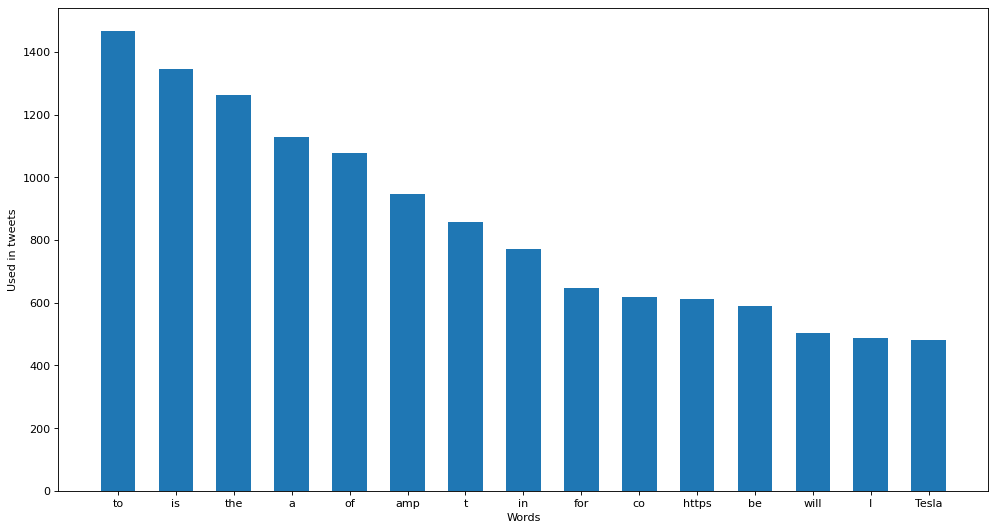

In [6]:

# we don't want to print all words yet, so let's have a look at 30 of them first
df = pandas.DataFrame(words_in_tweets.items(), columns=['word', 'used'])
df.sort_values('used',ascending=False, inplace=True)


fig = plt.figure(figsize=(15, 8), dpi=80)
ax = fig.add_subplot(111)
ax.bar('word', 'used', data=df.iloc[:15], width=0.6)
ax.set_ylabel('Used in tweets')
ax.set_xlabel('Words')
plt.show()



# Improving data quality

 We need to improve quality of our data. Let's delete some unimportant words like "the" "a" "is" etc,
 then print once again

- It is also a good idea to save words_in_tweets to pandas.dataFrame.
- We need to use the field *.created_at* in every tweet we are interested in (*downloaded_tweets*).


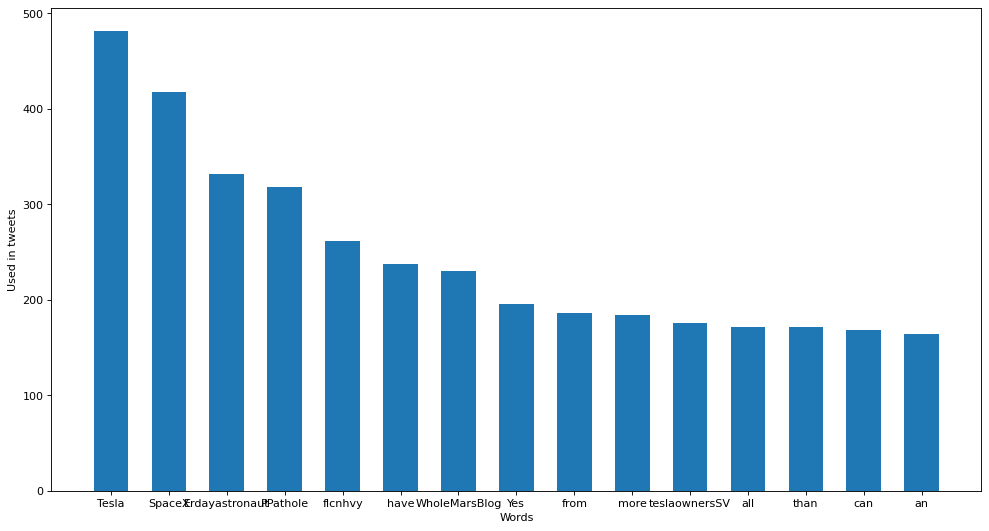

In [7]:

unimportant_words = ['the' ,'a', 'to', 'is', 't', 'of',
                     'be', 'will', 'that', 'this', 'https',
                     'co', 'on', 'we', 'with', 'so', 'for',
                     'at', 'but', 's', 'you', 'was', 'in',
                     'it', 'I', 'or', 'year', 'as', 'are',
                     'no', 'not', 'with', 'This', 'It', 'much',
                     'We', 'do', 'by', 'just', 'The', 'amp'
                     ]
for word in unimportant_words:
    words_to_work_with.pop(word, None)

df = pandas.DataFrame(words_to_work_with.items(), columns=['word', 'used'])
df.sort_values('used',ascending=False, inplace=True)


fig = plt.figure(figsize=(15, 8), dpi=80)
ax = fig.add_subplot(111)
ax.bar('word', 'used', data=df.iloc[:15], width=0.6)
ax.set_ylabel('Used in tweets')
ax.set_xlabel('Words')
plt.show()


In [9]:

# saving our dictionary to DataFrame
words_in_tweets_df = pandas.DataFrame(words_in_tweets.items(), columns=['word', 'used'])

display(HTML(words_in_tweets_df.head(15).to_html()))

# saving downloaded_tweets into a pandas.DataFrame
# firstly, we need to create list  which will help us putting interesting data in df

temp_list_of_dicts = []
for tweet in downloaded_tweets:
    temp_list_of_dicts.append({'id': tweet.id,
                               'text': tweet.full_text,
                               'date': tweet.created_at})

# FILTERING DATA
downloaded_tweets_df = pandas.DataFrame(temp_list_of_dicts)
downloaded_tweets_df['text'] = downloaded_tweets_df['text'].str.lower()

df_tesla_word = downloaded_tweets_df[downloaded_tweets_df['text'].str.contains('tesla', na=False)]

# we have tweets with words tesla or spacex
print(df_tesla_word.shape)


,word,used
0,TheRealShifo,2
1,The,224
2,true,62
3,battle,6
4,is,1344
5,between,30
6,fiat,10
7,amp,946
8,crypto,22
9,On,10


(892, 3)



# Downloading historical data of tesla stock prices

Let's check the oldest tweet and download stock data from this day.


In [10]:

# extracting date to string
oldest_tweet_about_tesla_date = str(df_tesla_word.date.iloc[-1])

oldest_tweet_about_tesla_date = oldest_tweet_about_tesla_date.split(' ')

oldest_tweet_about_tesla_date = oldest_tweet_about_tesla_date[0]

oldest_tweet_about_tesla_date = oldest_tweet_about_tesla_date.split('-')

# YEAR MONTH DAY
date_tesla = [int(a) for a in oldest_tweet_about_tesla_date]


In [11]:
# importing important libraries
from datetime import datetime
import yfinance as yahoofinance


In [12]:

# downloading dataframe from Yahoo Finance
start_date = datetime(date_tesla[0], date_tesla[1], date_tesla[2])
end_date = datetime.now()
tesla_stock_prices_data = yahoofinance.download('TSLA', start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed



# Adjusting and merging Dataframes


In [13]:

temp_DF = df_tesla_word.copy()
temp_DF.reset_index(inplace=True)
tweets_dates_list = []

temp_DF = temp_DF.drop(columns=['index', 'id', 'text'])
for row in temp_DF.date:
    tweets_dates_list.append(str(row).split(' ')[0])

# adjusting dataframe and cleaning data
tweets_dates_DF = pandas.DataFrame(data=tweets_dates_list)
tweets_dates_DF.drop_duplicates(inplace=True)
tweets_dates_DF =  tweets_dates_DF[::-1]
tweets_dates_DF.reset_index(inplace=True)
tweets_dates_DF = tweets_dates_DF.drop(columns=['index'])
tweets_dates_DF.columns = ['Date']

prices_data = tesla_stock_prices_data.copy()
prices_data.reset_index(inplace=True)
# changing TimeStamp to str (because tweets_dates_DF.Date is str)
prices_data['Date']= prices_data['Date'].astype(str)

# merging data to print relevant markers in specific dates, dropping useless columns
inner_merged = pandas.merge(tweets_dates_DF, prices_data)
inner_merged = inner_merged.drop(columns=['Open', 'Low', 'Close',
                                          'Adj Close', 'Volume'])
prices_data = prices_data.drop(columns=['Open', 'Low', 'Close',
                                          'Adj Close', 'Volume'])

display(HTML(inner_merged.head().to_html()))
display(HTML(prices_data.head().to_html()))


,Date,High
0,2020-07-06,275.558014
1,2020-07-07,285.899994
2,2020-07-08,283.451996
3,2020-07-09,281.712006
4,2020-07-10,309.783997


,Date,High
0,2020-07-06,275.558014
1,2020-07-07,285.899994
2,2020-07-08,283.451996
3,2020-07-09,281.712006
4,2020-07-10,309.783997



# Plotting stock prices with tweet days markers


<ipython-input-14-9d81f795a894>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  stock_price.set_xticklabels(prices_data.Date)
<ipython-input-14-9d81f795a894>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  musk_twitter_act = stock_fig.add_subplot(111)


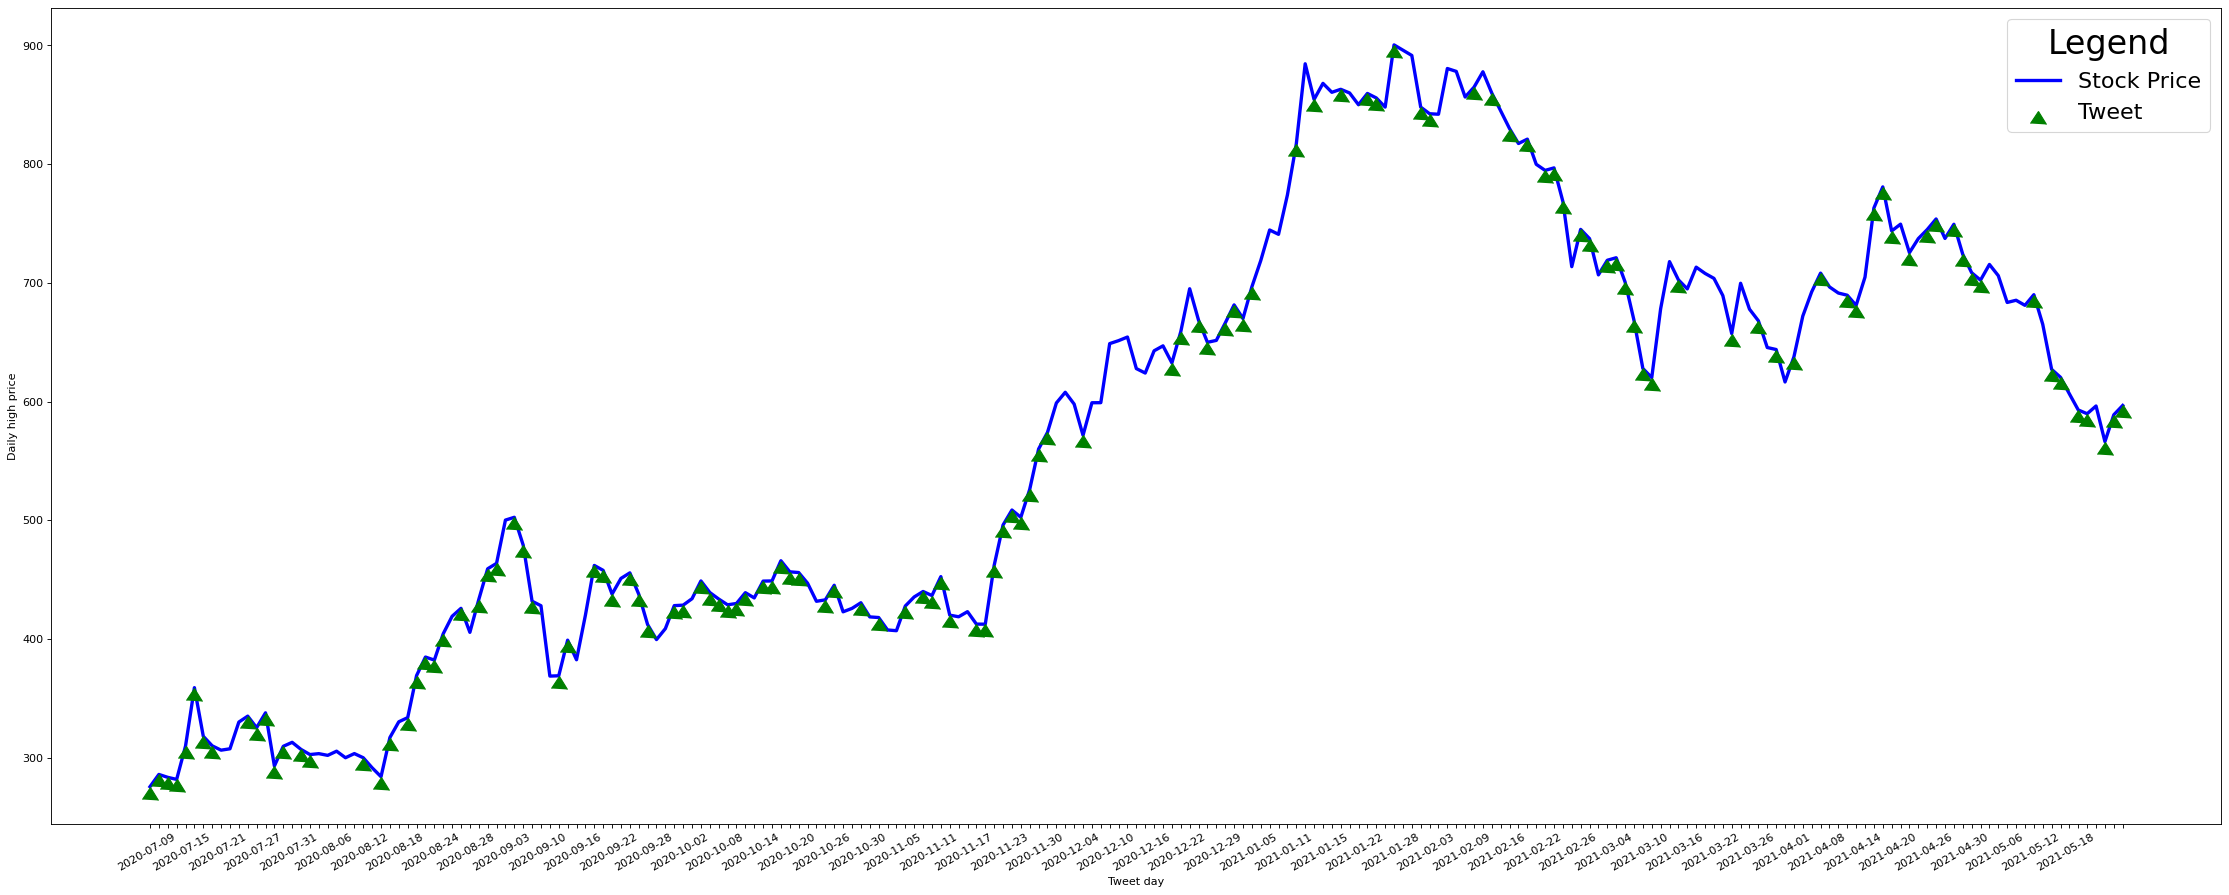

In [14]:

stock_fig = plt.figure(figsize=(35, 15), dpi=80)


stock_price = stock_fig.add_subplot(111)
stock_price.set_xticklabels(prices_data.Date)
stock_price.xaxis_date()
stock_price.plot(prices_data.Date, prices_data.High,
                 color='b', label='Stock Price', linewidth=3
                 )
stock_price.set_ylabel('Daily high price')
stock_price.set_xlabel('Date')

musk_twitter_act = stock_fig.add_subplot(111)
musk_twitter_act.xaxis_date()
musk_twitter_act.plot(inner_merged.Date, inner_merged.High,
                      marker=6, color='g', linestyle = 'None',
                      markersize=15, label='Tweet'
                      )
musk_twitter_act.set_xlabel('Tweet day')

# hiding every second x_label TWICE (to get 1/4 of original number of labels) to improve visibility
for label in stock_price.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
for label in stock_price.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

stock_fig.autofmt_xdate()
plt.legend(title="Legend", fontsize=20, title_fontsize=30)
plt.show()



# First analysis

At this point we can draw some conclusions, but firstly - let's think about the correlation between the tweet and the
stock price.
To explore this we can check some of financial indicators used in technical analysis like **moving average**.

### What is a moving average?
A moving average is a statistic that captures the average change in a data series over time.
In finance, moving averages are often used by technical analysts to keep track of prices trends for specific securities.
An upward trend in a moving average might signify an upswing in the price or momentum of a security,
while a downward trend would be seen as a sign of decline.


### What we can explore using a moving average?
Generally, technical analysts will use moving averages to detect whether a change in **momentum** is occurring for
a security. By calculating the moving average, the impacts of random,short-term fluctuations on the price of a stock
over a specified time-frame are mitigated.

We can describe moving average formula as:

\begin{align}
\textit{SMA}_{k} &= \frac{p_{n-k+1} + p_{n-k+2} \cdots + p_{n}}{k} = \frac{1}{k} \sum_{i=n-k+1}^{n} p_{i}
\end{align}


[You can read more about basic financial analysis here](https://www.investopedia.com/terms/m/movingaverage.asp
 "investopedia.com")


In [15]:

# dataframe setup for difference and moving average
prices_data['Difference'] = prices_data.High.diff()
inner_merged.drop('High', inplace=True, axis=1)

# marking tweet day
inner_merged['tweet_day'] = 'tweet'


In [17]:
# merging dataframes to illustrate differences at the tweet days
# showing and calculating moving average for 4 last prices
difference_compared = pandas.merge(prices_data, inner_merged, on='Date', how='outer')
difference_compared['MovingAverage_10'] = difference_compared.iloc[:,1].rolling(window=10).mean()

display(HTML(difference_compared.head(30).to_html()))


,Date,High,Difference,tweet_day,MovingAverage_10
0,2020-07-06,275.558014,NaN,tweet,NaN
1,2020-07-07,285.899994,10.341980,tweet,NaN
2,2020-07-08,283.451996,-2.447998,tweet,NaN
3,2020-07-09,281.712006,-1.739990,tweet,NaN
4,2020-07-10,309.783997,28.071991,tweet,NaN
5,2020-07-13,358.997986,49.213989,tweet,NaN
6,2020-07-14,318.000000,-40.997986,tweet,NaN
7,2020-07-15,310.000000,-8.000000,tweet,NaN
8,2020-07-16,306.342010,-3.657990,NaN,NaN
9,2020-07-17,307.502014,1.160004,NaN,303.724802


<ipython-input-18-3bd9554f7431>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  stock_price.set_xticklabels(prices_data.Date)
<ipython-input-18-3bd9554f7431>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  musk_twitter_act = stock_fig.add_subplot(111)
<ipython-input-18-3bd9554f7431>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  moving_average = stock_fig.add_subplot(111)


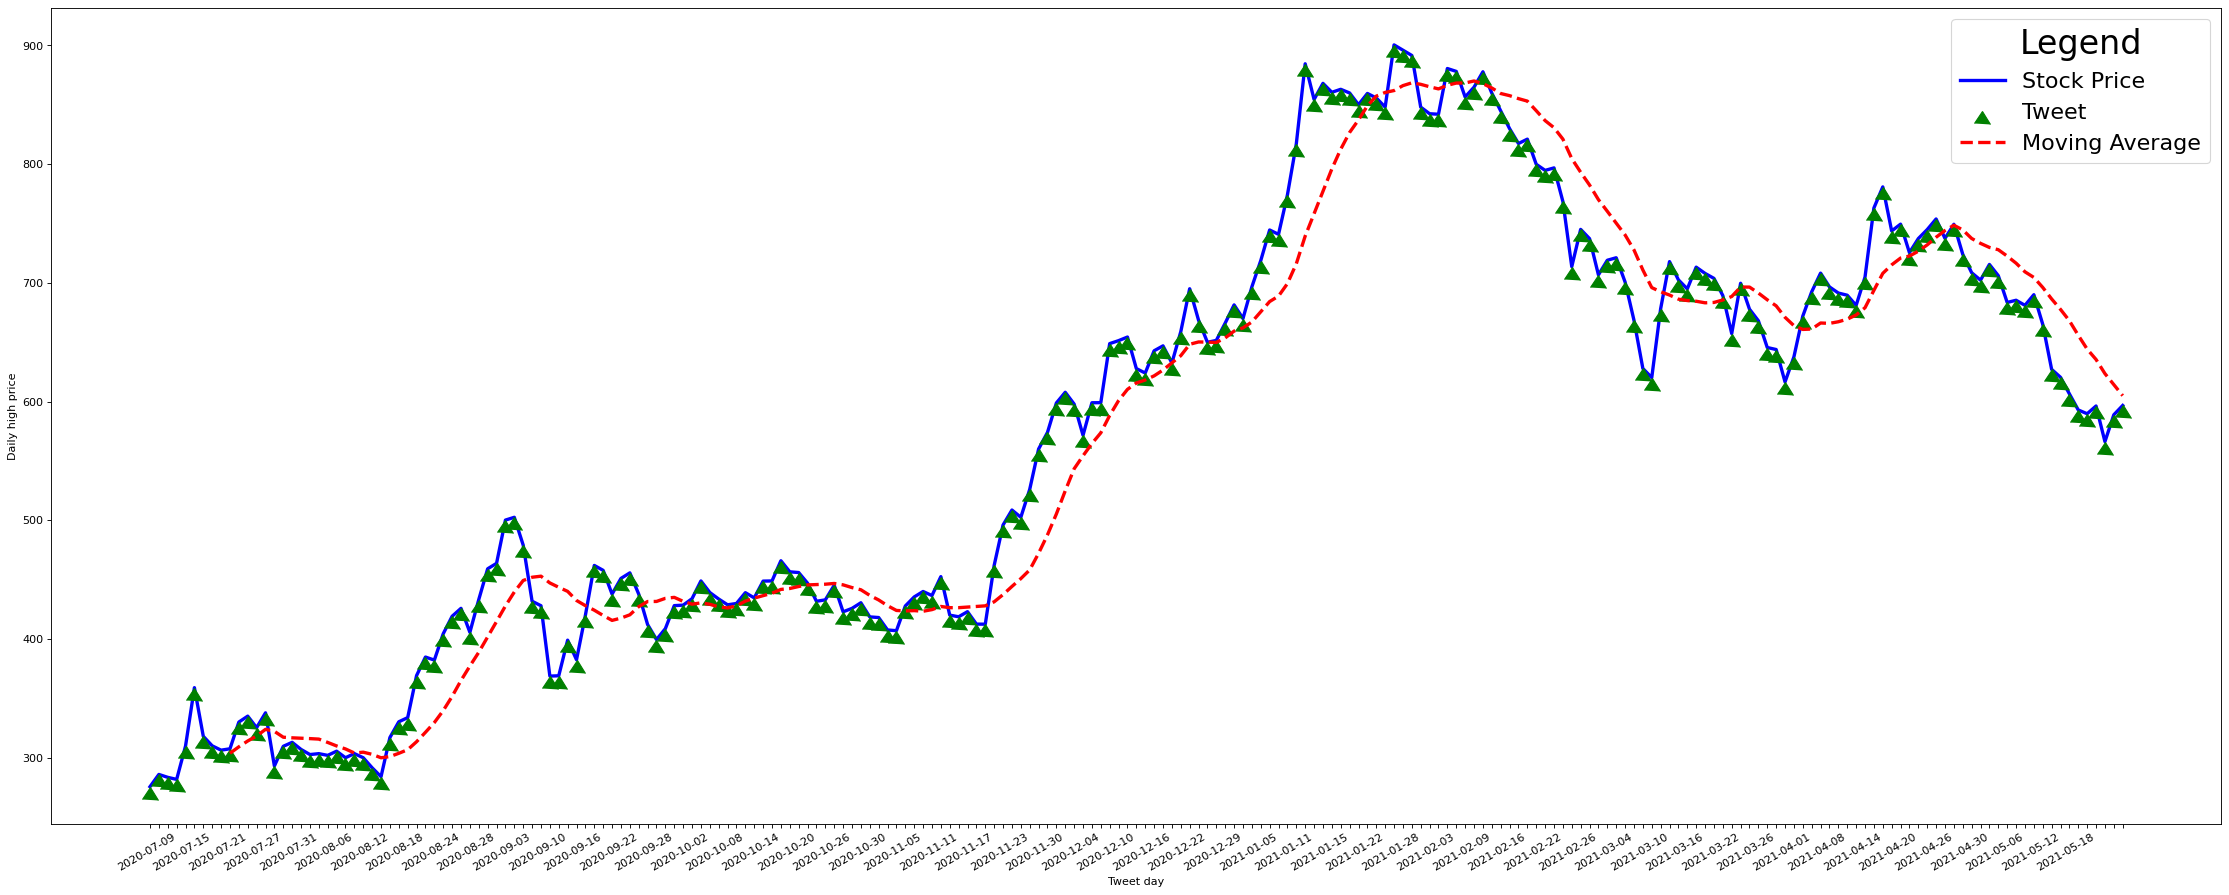

In [18]:

stock_fig = plt.figure(figsize=(35, 15), dpi=80)


stock_price = stock_fig.add_subplot(111)
stock_price.set_xticklabels(prices_data.Date)
stock_price.xaxis_date()
stock_price.plot(prices_data.Date, prices_data.High,
                 color='b', linewidth=3, label='Stock Price'
                 )
stock_price.set_ylabel('Daily high price')
stock_price.set_xlabel('Date')

musk_twitter_act = stock_fig.add_subplot(111)
musk_twitter_act.xaxis_date()
musk_twitter_act.plot(difference_compared.Date, difference_compared.High,
                      marker=6, color='g',
                      linestyle = 'None', markersize=15,
                      label='Tweet'
                      )
musk_twitter_act.set_xlabel('Tweet day')

moving_average = stock_fig.add_subplot(111)
moving_average.xaxis_date()
moving_average.plot(difference_compared.Date, difference_compared.MovingAverage_10,
                    color='r', linestyle='dashed', linewidth=3, label='Moving Average'
                    )

# hiding every second x_label TWICE (to get 1/4 of original number of labels) to improve visibility
for label in stock_price.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
for label in stock_price.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

stock_fig.autofmt_xdate()
plt.legend(title="Legend", fontsize=20, title_fontsize=30)
plt.show()



# Summarization

